
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 9
#### Israel Pavelek



Síntesis de funciones de excitación
1) Sea la función:

$$ Z(s) = \frac{(s^2+3)(s^2+1)}{s(s^2+2)} $$

Se pide hallar la topología circuital y los valores de los componentes para:

a) Síntesis de \( Z(s) \) mediante el método de Foster en su versión  "paralelo" o "derivación".

b) Idem a) mediante Cauer 1 y 2.

2) Sea 

$$ Y(s) = \frac{3s(s^2+7/3)} { (s^2+2) (s^2+5) } $$

Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

<img src="./Circuito.png" align="center" width="400" /> 


### Foster I

$Z(s)=\frac{K_0}{s}+\frac{2K_1s}{s^2+2}+K_\infty s $

$K_0=sZ(s)|_{s=0}=\frac32$

$2K_1=\frac{Z(s)}{s} (s^2+2)|_{s=j\sqrt2}=\frac12$

$K_\infty=\frac{Z(s)}{s}|_{S\rightarrow \infty}=1$

$Z(s)=\frac{1}{s \frac23}+\frac{\frac12S}{s^2+2}+s$

$Z(s)=\frac{1}{s \frac23}+\frac{1}{2s+\frac{1}{s\frac14}}+s$

<img src="./cir1.png" align="center" width="400" /> 


### Foster II

$$Y(s) = \frac{s(s^2+2)}{(s^2+3)(s^2+1)}$$

$Y(s)=\frac{2K_1s}{s^2+1}+\frac{2K_2s}{s^2+3} $

$2K_1=\frac{Y(s)}{s} (s^2+1)|_{s=j1}=\frac12$

$2K_2=\frac{Y(s)}{s} (s^2+3)|_{s=j\sqrt3}=\frac12$

$Y(s)=\frac{\frac{1}{2}s}{s^2+1}+\frac{\frac{1}{2}s}{s^2+3}=\frac{1}{2s+\frac{2}{s}}+\frac{1}{2s+\frac{6}{s}}$

<img src="./cir2.png" align="center" width="400" /> 

### Cauer I

Removemos polos en alta frecuencia y alternanamos Z  e Y.


In [24]:
from sympy import *
init_printing(use_unicode=True)
s = symbols('s')
Z=(((s*s+1)*(s*s+3))/(s*(s*s+2)))
def cauerI (fn):
    Impe=True
    while(fn!=0):
        if(Impe==true):
            print("Se removio un inductor en serie de valor: " + str(limit(fn/s,s,oo)))
        else:
            print("Se removio un capacitor en derivacion de valor: " + str(limit(fn/s,s,oo)))
        Impe=not(Impe)
        fn=fn-limit(fn/s,s,oo)*s
        if(fn==0):
            continue
        fn=simplify(1/fn)

cauerI(Z)

Se removio un inductor en serie de valor: 1
Se removio un capacitor en derivacion de valor: 1/2
Se removio un inductor en serie de valor: 4
Se removio un capacitor en derivacion de valor: 1/6


El circuito que nos queda es:

<img src="./cir3.png" align="center" width="400" /> 

### Cauer II

Removemos polos en baja frecuencia y alternanamos Z  e Y.

In [25]:
Z=(((s*s+1)*(s*s+3))/(s*(s*s+2)))

def cauerII (fn):
    fn=Z    
    Impe=True
    while(fn!=0):
        if(Impe==true):
            print("Se removio un capacitor en serie de valor: " + str(1/limit(fn*s,s,0)))
        else:
            print("Se removio un inductor en derivacion de valor: " + str(1/limit(fn*s,s,0)))
        Impe=not(Impe)
        fn=fn-limit(fn*s,s,0)/s
        if(fn==0):
            continue
        fn=simplify(1/fn)
cauerII(Z)        

Se removio un capacitor en serie de valor: 2/3
Se removio un inductor en derivacion de valor: 5/4
Se removio un capacitor en serie de valor: 2/25
Se removio un inductor en derivacion de valor: 5


El circuito que nos queda es:

<img src="./cir4.png" align="center" width="400" /> 


### Ejercicio 2

$$ Y(s) = \frac{3s(s^2+7/3)} { (s^2+2) (s^2+5) } $$

Sintesis gráfica

<img src="./sintesisgrafica.png" align="center" width="700" /> 


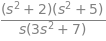

In [26]:
Z=(((s*s+2)*(s*s+5))/((s)*(3*s*s+7)))
Z

Hacemos una remoción parcial del polo en continua para ubicar el cero en j1

In [27]:
K1=s*Z.subs(s*s,-1)
K1

Removemos un capacitor en serie de valor 1

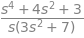

In [28]:
Z2=Z-K1/s
simplify(Z2)

Ahora invertimos y removemos el cero generado como polo de admitancia en j1

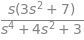

In [29]:
Y2=1/Z2
simplify(Y2)

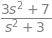

In [30]:
Y2=((Y2*(s*s+1))/s)
simplify(Y2)

Evaluado en s=j1 vale 2

Removemos una serie LC en derivación que resuena en j1

El valor de L=1/2 y C= 2

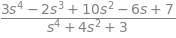

In [31]:
Y4=Y2-(s*2)/(s*s+1)
simplify(Y4)

Nos queda una serie LC en derivación que resuena en $j\sqrt3$

El valor de L=1 y el de C=1/3

<img src="./ej2.png" align="center" width="400" /> 
